In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
data = pd.read_csv("../data/Churn_Modelling.csv")
data = data.drop(columns=["CustomerId","RowNumber","Surname"], errors="ignore")
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
label_encoders = {}

for col in data.select_dtypes(include=["object","string"]).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

In [5]:
X = data.drop("Exited", axis=1)
y = data["Exited"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8135
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1607
           1       0.59      0.17      0.27       393

    accuracy                           0.81      2000
   macro avg       0.71      0.57      0.58      2000
weighted avg       0.78      0.81      0.77      2000



c:\Users\Dell\OneDrive\Documents\customer churn\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 2000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=2000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
print(X.columns)

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='str')


In [9]:
def get_int(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Please enter a valid number.")

credit_score = get_int("Credit Score: ")
age = get_int("Age: ")
tenure = get_int("Tenure: ")

def get_float(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Please enter a valid number.")

balance = get_float("Balance: ")
salary = get_float("Estimated Salary: ")

products = int(input("Number of Products: "))

sample = pd.DataFrame([{
    "CreditScore": credit_score,
    "Geography": 0,        # encoded value
    "Gender": 0,           # encoded value
    "Age": age,
    "Tenure": tenure,
    "Balance": balance,
    "NumOfProducts": products,
    "HasCrCard": 1,
    "IsActiveMember": 1,
    "EstimatedSalary": salary
}])

sample = sample[X.columns]  # ensures correct order

prediction = model.predict(sample)

if prediction[0] == 1:
    print("Customer is likely to churn")
else:
    print("Customer is NOT likely to churn")



Customer is NOT likely to churn


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

Churn Distribution

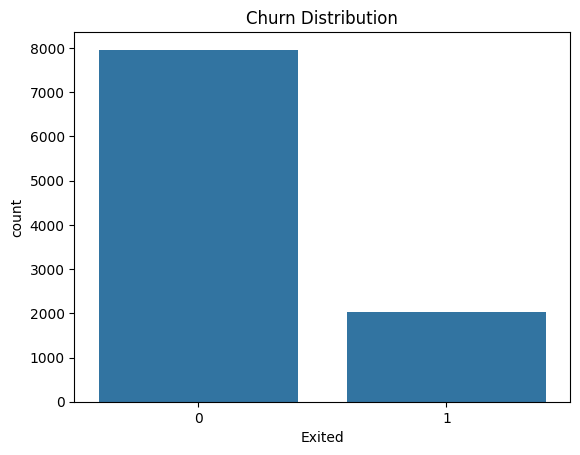

In [11]:
sns.countplot(x='Exited', data=data)
plt.title("Churn Distribution")
plt.show()

Age vs Churn

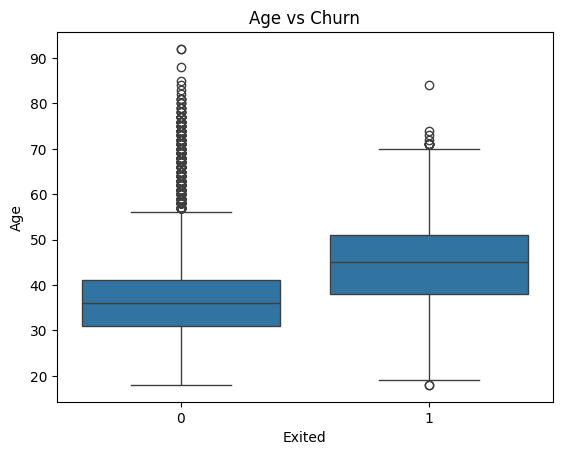

In [12]:
sns.boxplot(x="Exited", y="Age", data=data)
plt.title("Age vs Churn")
plt.show()

Balance vs Churn

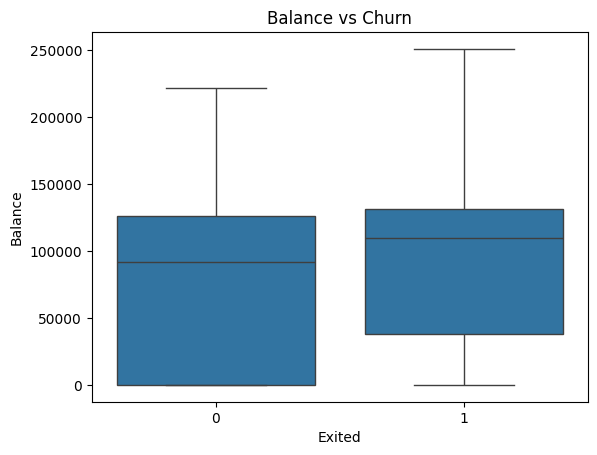

In [13]:
sns.boxplot(x="Exited", y="Balance", data=data)
plt.title("Balance vs Churn")
plt.show()

Correlation Heatmap

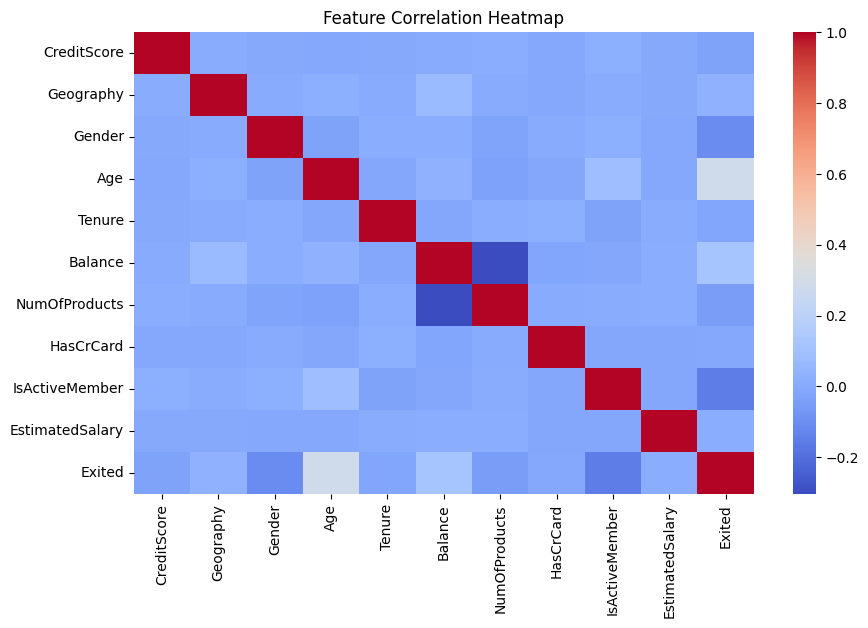

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

Confusion Matrix Heatmap

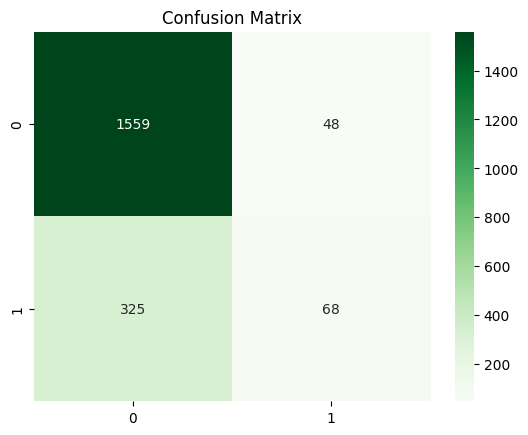

In [17]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix")
plt.show()